##Instalación de Paquetes

In [ ]:
!pip install fancyimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Importar Librerías

In [ ]:
from pandas._libs import missing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer as MI
from google.colab import drive
from sqlalchemy import true
from sklearn.decomposition import PCA
import numpy as np
from keras.optimizers import SGD
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
tf.test.gpu_device_name()

''

##Conectar con Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("drive/MyDrive/I.A/BasesDatos/MLB1.csv")

##Desarrollo

In [ ]:
df

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,...,0,11.99,B,2,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,...,0,11.99,B,2,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,...,0,15.99,D,4,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,...,0,19.99,E,5,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

##Análisis de los datos

<ipython-input-13-d2e3b9eac37c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8,square=True,


<Axes: title={'center': 'Corr. Pearson'}>

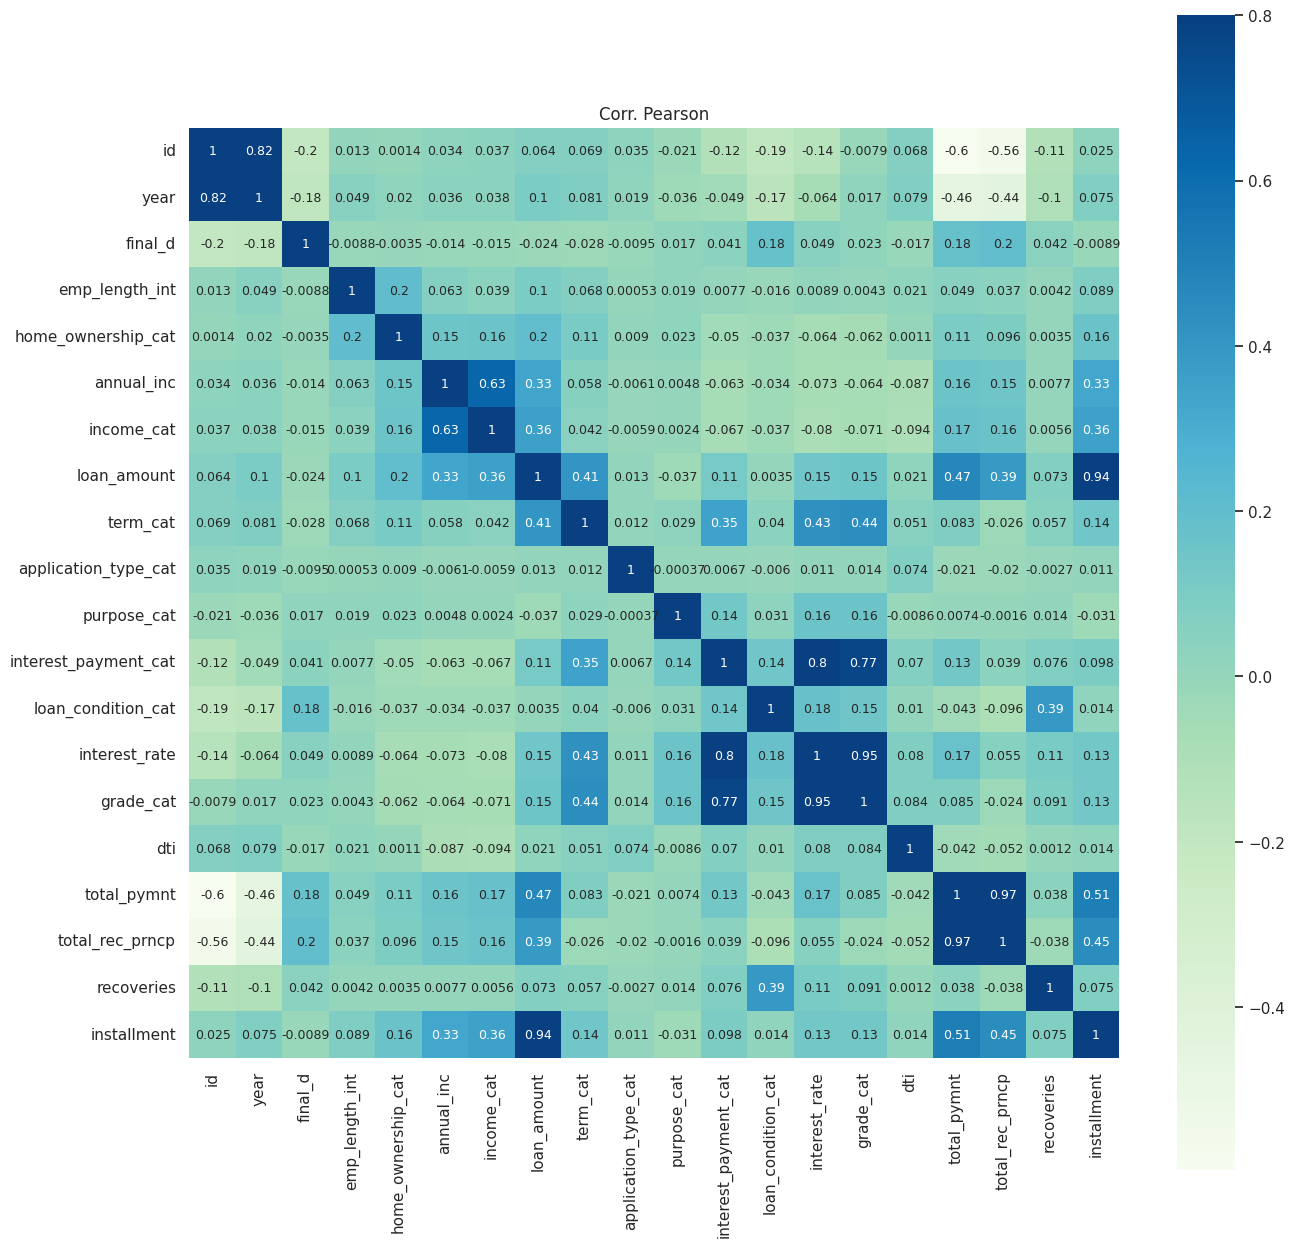

In [ ]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Corr. Pearson")
sns.heatmap(df.corr(),vmax=0.8,square=True,
            cmap="GnBu",linecolor='r',
            annot=True,annot_kws={'size':9})

##Eliminación de Datos

In [ ]:
df=df.drop(['id'],axis=1)
df=df.drop(['issue_d'],axis=1)
df=df.drop(['home_ownership_cat'],axis=1)
df=df.drop(['term_cat'],axis=1)
df=df.drop(['income_cat'],axis=1)
df=df.drop(['application_type_cat'],axis=1)
df=df.drop(['purpose_cat'],axis=1)
df=df.drop(['interest_payment_cat'],axis=1)
df=df.drop(['loan_condition_cat'],axis=1)
df=df.drop(['grade_cat'],axis=1)
df=df.drop(['loan_amount'],axis=1)
#df=df.drop(['installment'],axis=1)
#df=df.drop(['interest_rate'],axis=1)
df=df.drop(['total_rec_prncp'],axis=1)

In [ ]:
# df['year'] = df['year'].astype(str)
# df['year_i'] = df['year']
# df['year_i'] = df['year'].astype(int)
# df = df.drop('year', axis=1)

# df['final_d'] = df['final_d'].astype(str)
# df['year_f'] = df['final_d'].str[-4:]
# df['year_f'] = df['year_f'].astype(int)
# df = df.drop('final_d', axis=1)

# df['time_elapsed'] = df['year_f'] - df['year_i']
# df = df.drop('year_i', axis=1)
# df = df.drop('year_f', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               887379 non-null  int64  
 1   final_d            887379 non-null  int64  
 2   emp_length_int     887379 non-null  float64
 3   home_ownership     887379 non-null  object 
 4   income_category    887379 non-null  object 
 5   annual_inc         887379 non-null  int64  
 6   term               887379 non-null  object 
 7   application_type   887379 non-null  object 
 8   purpose            887379 non-null  object 
 9   interest_payments  887379 non-null  object 
 10  loan_condition     887379 non-null  object 
 11  interest_rate      887379 non-null  float64
 12  grade              887379 non-null  object 
 13  dti                887379 non-null  float64
 14  total_pymnt        887379 non-null  float64
 15  recoveries         887379 non-null  float64
 16  in

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,887379.0,2.014022e+03,1.261741,2007.00,2013.000,2.014000e+03,2.015000e+03,2.015000e+03
final_d,887379.0,1.047089e+06,45551.493573,1012008.00,1012016.000,1.012016e+06,1.092015e+06,1.122015e+06
emp_length_int,887379.0,6.050564e+00,3.507405,0.50,3.000,6.050000e+00,1.000000e+01,1.000000e+01
annual_inc,887379.0,7.502759e+04,64698.154281,0.00,45000.000,6.500000e+04,9.000000e+04,9.500000e+06
interest_rate,887379.0,1.324674e+01,4.381867,5.32,9.990,1.299000e+01,1.620000e+01,2.899000e+01
dti,887379.0,1.815704e+01,17.190626,0.00,11.910,1.765000e+01,2.395000e+01,9.999000e+03
total_pymnt,887379.0,7.558827e+03,7871.243336,0.00,1914.590,4.894999e+03,1.061681e+04,5.777758e+04
recoveries,887379.0,4.591924e+01,409.693874,0.00,0.000,0.000000e+00,0.000000e+00,3.352027e+04
installment,887379.0,4.367171e+02,244.186593,15.67,260.705,3.825500e+02,5.726000e+02,1.445460e+03


<ipython-input-18-d2e3b9eac37c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),vmax=0.8,square=True,


<Axes: title={'center': 'Corr. Pearson'}>

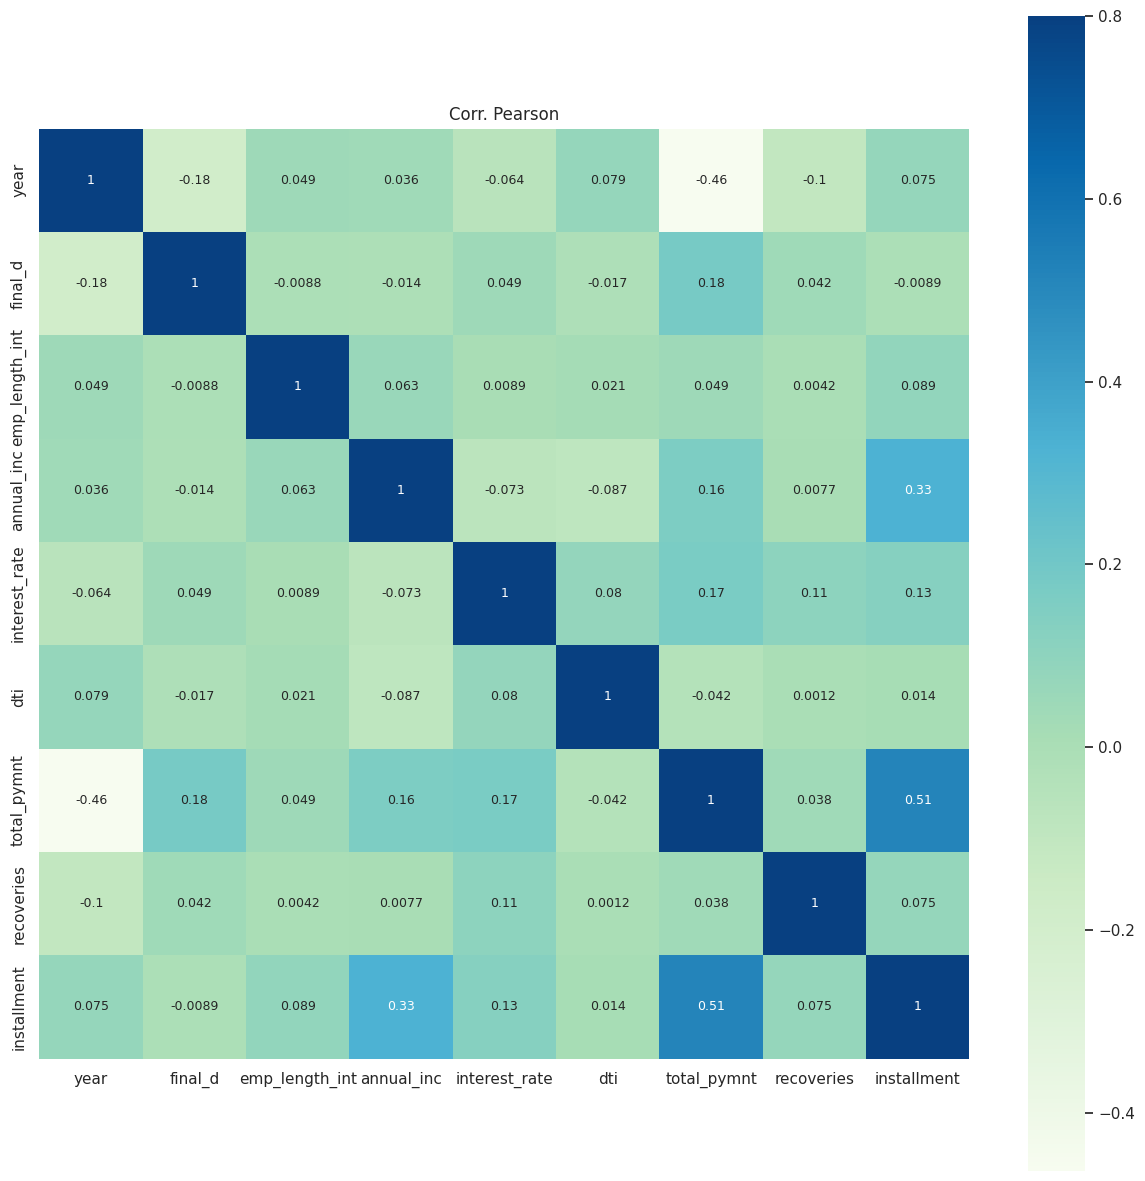

In [ ]:
sns.set(style='whitegrid', font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Corr. Pearson")
sns.heatmap(df.corr(),vmax=0.8,square=True,
            cmap="GnBu",linecolor='r',
            annot=True,annot_kws={'size':9})

##Análisis de Linealidad

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'final_d'}>,
        <Axes: title={'center': 'emp_length_int'}>],
       [<Axes: title={'center': 'annual_inc'}>,
        <Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'dti'}>],
       [<Axes: title={'center': 'total_pymnt'}>,
        <Axes: title={'center': 'recoveries'}>,
        <Axes: title={'center': 'installment'}>]], dtype=object)

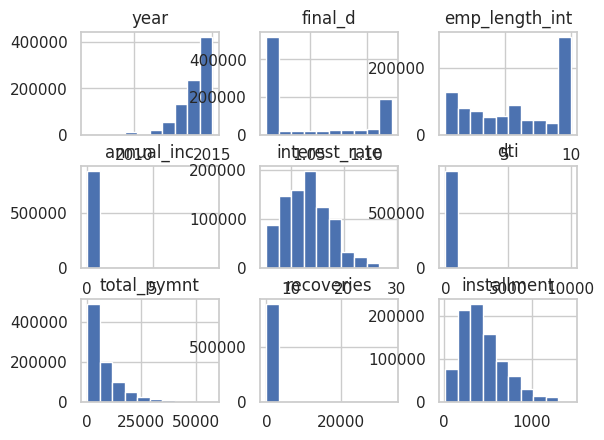

In [ ]:
df.hist()

Aplicar Dummies a la data

In [ ]:
X = pd.get_dummies(df, columns=['home_ownership', 'income_category', 'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'region'])

In [ ]:
X = X.drop('grade',axis=1)

Separación de X, y

In [ ]:
#X = df.drop('grade',axis=1)
y = df['grade']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         887379 non-null  int64  
 1   final_d                      887379 non-null  int64  
 2   emp_length_int               887379 non-null  float64
 3   annual_inc                   887379 non-null  int64  
 4   interest_rate                887379 non-null  float64
 5   dti                          887379 non-null  float64
 6   total_pymnt                  887379 non-null  float64
 7   recoveries                   887379 non-null  float64
 8   installment                  887379 non-null  float64
 9   home_ownership_ANY           887379 non-null  uint8  
 10  home_ownership_MORTGAGE      887379 non-null  uint8  
 11  home_ownership_NONE          887379 non-null  uint8  
 12  home_ownership_OTHER         887379 non-null  uint8  
 13 

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 887379 entries, 0 to 887378
Series name: grade
Non-Null Count   Dtype 
--------------   ----- 
887379 non-null  object
dtypes: object(1)
memory usage: 6.8+ MB


In [ ]:
y.value_counts()

B    254535
C    245860
A    148202
D    139542
E     70705
F     23046
G      5489
Name: grade, dtype: int64

Unificar las categorías F y G en E

In [ ]:
y = y.replace(['F', 'G'], 'E')

In [ ]:
y.value_counts()

B    254535
C    245860
A    148202
D    139542
E     99240
Name: grade, dtype: int64

Aplicar Dummies a los datos

In [ ]:
#X_dummies = pd.get_dummies(X, columns=['home_ownership', 'income_category', 'term', 'application_type', 'purpose', 'interest_payments', 'loan_condition', 'region'])

In [ ]:
#X_dummies.info()

##Eliminación de atípicos

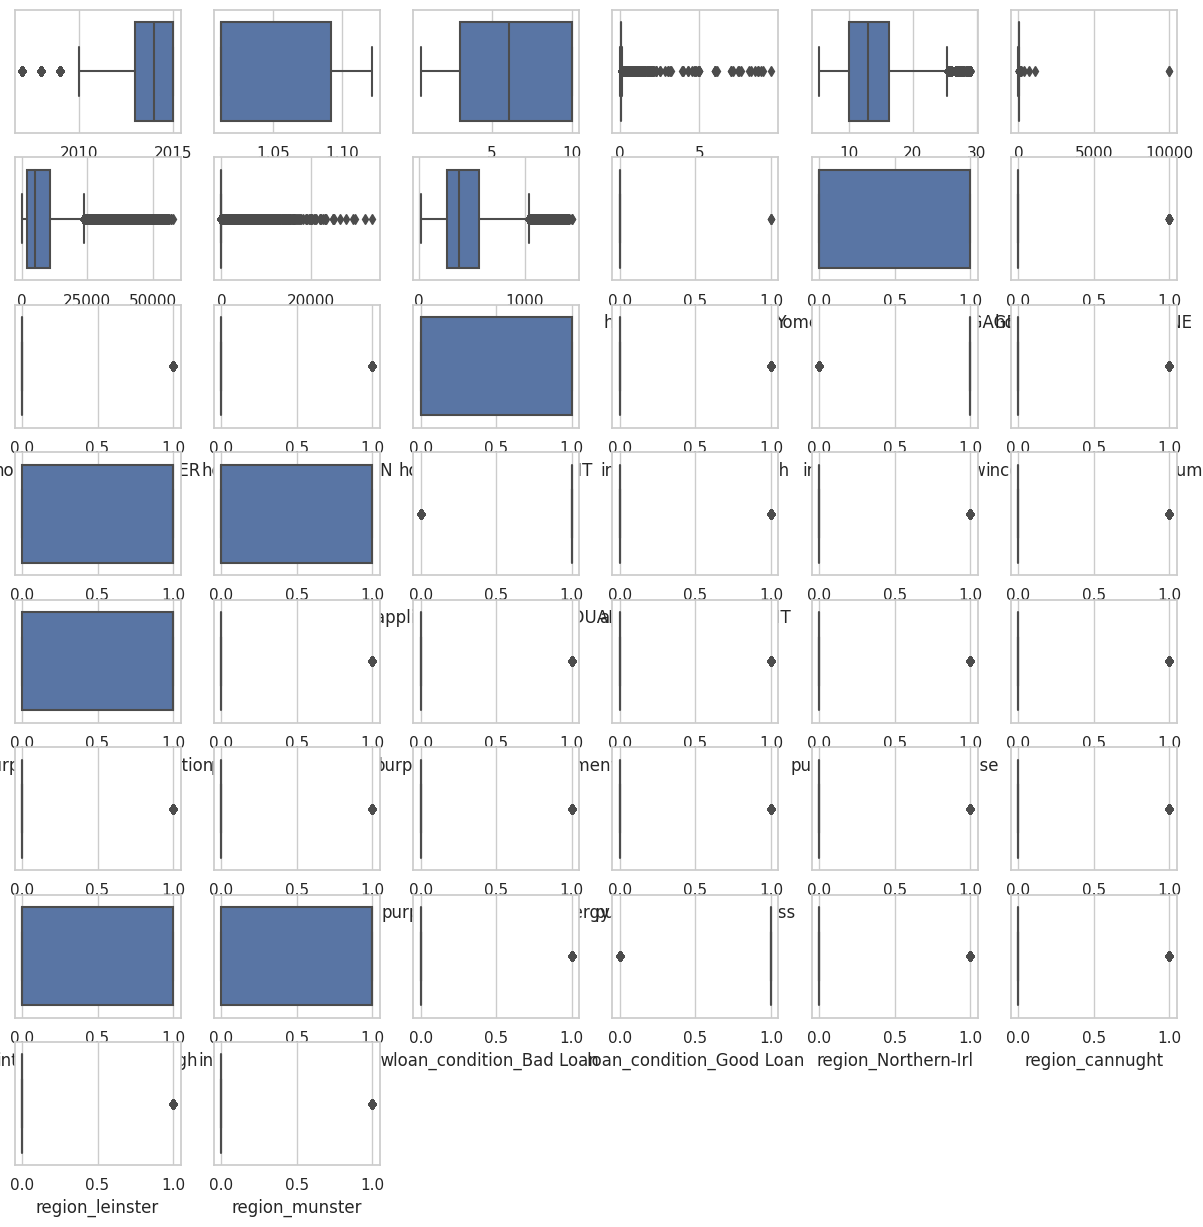

In [ ]:
plt.figure(figsize=(15,15))
col =X.columns[:-1]
for i in enumerate(col):
  plt.subplot(8,6,i[0]+1)
  sns.boxplot(x=i[1],data=X)

In [ ]:
for i in col:
  q1 = X[i].quantile(0.10)
  q4 = X[i].quantile(0.90)
  X[i][X[i]<=q1] = q1
  X[i][X[i]>=q4] = q4

<ipython-input-31-059b4f7ef883>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i][X[i]<=q1] = q1
<ipython-input-31-059b4f7ef883>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i][X[i]>=q4] = q4
<ipython-input-31-059b4f7ef883>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i][X[i]<=q1] = q1
<ipython-input-31-059b4f7ef883>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

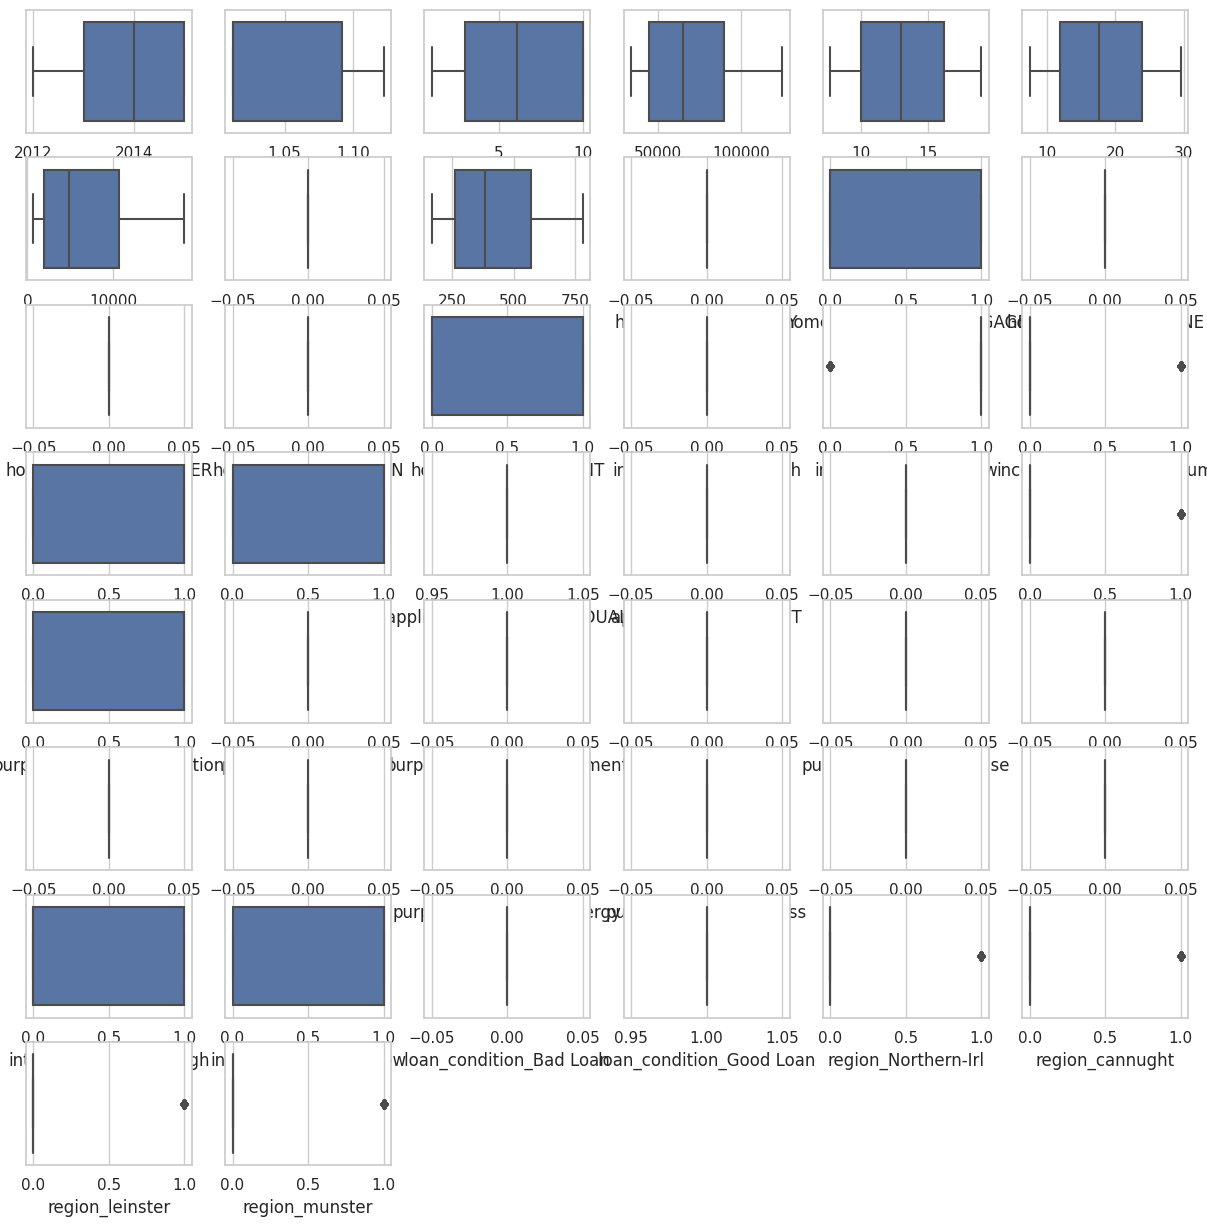

In [ ]:
plt.figure(figsize=(15,15))
col =X.columns[:-1]
for i in enumerate(col):
  plt.subplot(8,6,i[0]+1)
  sns.boxplot(x=i[1],data=X)

##Balanceo con RUS

In [ ]:
y.value_counts()

B    254535
C    245860
A    148202
D    139542
E     99240
Name: grade, dtype: int64

In [ ]:
rus=RandomUnderSampler(random_state = 0)
X_rus, y_rus = rus.fit_resample(X,y)

In [ ]:
X_rus

,year,final_d,emp_length_int,annual_inc,interest_rate,dti,total_pymnt,recoveries,installment,home_ownership_ANY,...,purpose_wedding,interest_payments_High,interest_payments_Low,loan_condition_Bad Loan,loan_condition_Good Loan,region_Northern-Irl,region_cannught,region_leinster,region_munster,region_ulster
0,2014,1042015,10.00,75000,8.39,29.01,15830.20,0.0,472.75,0,...,0,0,1,0,1,0,0,0,0,1
1,2012,1062014,7.00,89000,8.90,21.84,18254.58,0.0,497.04,0,...,0,0,1,0,1,0,1,0,0,0
2,2015,1012016,10.00,63000,7.69,9.62,1857.70,0.0,206.66,0,...,0,0,1,0,1,0,0,0,1,0
3,2013,1052015,3.00,75000,7.69,7.45,6426.35,0.0,184.23,0,...,0,0,1,0,1,1,0,0,0,0
4,2015,1122015,10.00,65000,7.69,7.45,690.15,0.0,464.95,0,...,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496195,2015,1012016,1.00,108000,18.99,12.47,5392.73,0.0,450.97,0,...,0,1,0,0,1,0,0,0,0,1
496196,2015,1012016,1.00,34000,18.99,29.57,4547.34,0.0,381.76,0,...,0,1,0,0,1,0,0,1,0,0
496197,2015,1012016,4.00,120000,18.99,17.40,8218.42,0.0,688.42,0,...,0,1,0,0,1,0,0,0,1,0
496198,2015,1082015,6.05,34000,18.99,29.44,2396.05,0.0,399.04,0,...,0,1,0,0,1,0,1,0,0,0


In [ ]:
X_rus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496200 entries, 0 to 496199
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         496200 non-null  int64  
 1   final_d                      496200 non-null  int64  
 2   emp_length_int               496200 non-null  float64
 3   annual_inc                   496200 non-null  int64  
 4   interest_rate                496200 non-null  float64
 5   dti                          496200 non-null  float64
 6   total_pymnt                  496200 non-null  float64
 7   recoveries                   496200 non-null  float64
 8   installment                  496200 non-null  float64
 9   home_ownership_ANY           496200 non-null  uint8  
 10  home_ownership_MORTGAGE      496200 non-null  uint8  
 11  home_ownership_NONE          496200 non-null  uint8  
 12  home_ownership_OTHER         496200 non-null  uint8  
 13 

In [ ]:
y_rus.value_counts()

A    99240
B    99240
C    99240
D    99240
E    99240
Name: grade, dtype: int64

##Aplicar Escalado

In [ ]:
scalerMinMax= MinMaxScaler()
scalerMinMax.fit(X_rus)
Xs=scalerMinMax.transform(X_rus)

In [ ]:
Xs

array([[0.66666667, 0.27272066, 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.4545314 , 0.66666667, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.63636033, 0.56111111, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
y_rus_dummies = pd.get_dummies(y_rus)
y_rus_dummies

,A,B,C,D,E
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
496195,0,0,0,0,1
496196,0,0,0,0,1
496197,0,0,0,0,1
496198,0,0,0,0,1


##Modelado

In [ ]:
X_rus_train,X_rus_test,y_train,y_test = train_test_split(Xs,y_rus_dummies ,random_state=20000,test_size=0.2)

In [ ]:
y_test.shape

(99240, 5)

In [ ]:
# Modelo Neuronal
modelANN= Sequential()
modelANN.add(Dense(12,activation='relu' ))
modelANN.add(Dense(5,activation='softmax'))
modelANN.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
modelANN.fit(x = X_rus_train, y = y_train, validation_data=(X_rus_test,y_test), batch_size=1000, epochs=400, verbose=1)

Epoch 1/400
397/397 [==============================] - 2s 5ms/step - loss: 0.1519 - accuracy: 0.9372 - val_loss: 0.1500 - val_accuracy: 0.9386
Epoch 2/400
397/397 [==============================] - 3s 7ms/step - loss: 0.1520 - accuracy: 0.9373 - val_loss: 0.1497 - val_accuracy: 0.9378
Epoch 3/400
397/397 [==============================] - 4s 9ms/step - loss: 0.1520 - accuracy: 0.9372 - val_loss: 0.1503 - val_accuracy: 0.9382
Epoch 4/400
397/397 [==============================] - 2s 6ms/step - loss: 0.1519 - accuracy: 0.9373 - val_loss: 0.1494 - val_accuracy: 0.9386
Epoch 5/400
397/397 [==============================] - 3s 7ms/step - loss: 0.1520 - accuracy: 0.9372 - val_loss: 0.1503 - val_accuracy: 0.9374
Epoch 6/400
397/397 [==============================] - 2s 6ms/step - loss: 0.1518 - accuracy: 0.9374 - val_loss: 0.1498 - val_accuracy: 0.9376
Epoch 7/400
397/397 [==============================] - 3s 7ms/step - loss: 0.1519 - accuracy: 0.9374 - val_loss: 0.1503 - val_accuracy: 0.9370

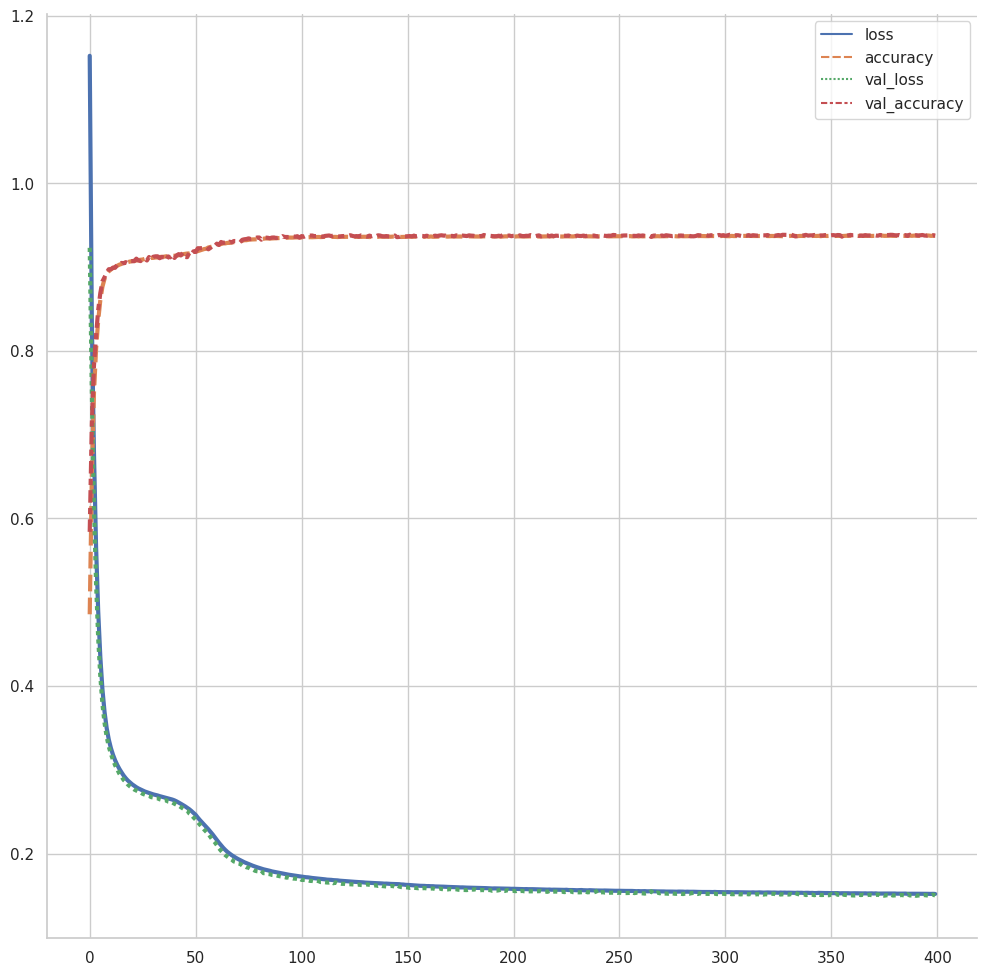

In [ ]:
loss = pd.DataFrame(modelANN.history.history)
plt.figure(figsize=(12,12))
sns.lineplot(data=loss,lw=3)
sns.despine()

In [ ]:
y_predict=modelANN.predict(X_rus_test)
y_predict=(y_predict>0.5)
print(classification_report(y_test,y_predict))

3102/3102 [==============================] - 5s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19801
           1       0.96      0.94      0.95     19988
           2       0.93      0.92      0.92     19698
           3       0.92      0.86      0.89     19957
           4       0.90      0.96      0.93     19796

   micro avg       0.94      0.93      0.94     99240
   macro avg       0.94      0.93      0.94     99240
weighted avg       0.94      0.93      0.94     99240
 samples avg       0.93      0.93      0.93     99240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
